In [16]:
import pickle
import pandas as pd
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt

# import sys; sys.path.append('/home/users/piyushb/projects/correlation-GAN/')
# from utils.constants import DATA_DIR

In [17]:
sns.set(color_codes=True)

In [18]:
def generate_2d_data(num_samples, rho):
    """Generates 2D data (X_i, Y_i) such that correlation(X, Y) = rho"""
    
    X = np.random.multivariate_normal(mean=np.array([0.0, 0.0]), cov=np.eye(2), size=num_samples)
    L = np.array([[1.0, 0.0], [rho, np.sqrt(1 - (rho ** 2))]])
    Y = np.dot(L, X.T).T

    return Y

In [19]:
def plot_2d_distribution(data, color):
    assert isinstance(data, np.ndarray) and data.shape[1] == 2

    df = pd.DataFrame(data, columns=["x", "y"])
    g = sns.jointplot(x="x", y="y", data=df, kind="kde")
    g.plot_joint(plt.scatter, c=color, s=30, linewidth=2, marker="o")
    g.ax_joint.collections[0].set_alpha(0)
    g.set_axis_labels("$X_{1}$", "$X_{2}$");

In [20]:
NUM_SAMPLES = 5000

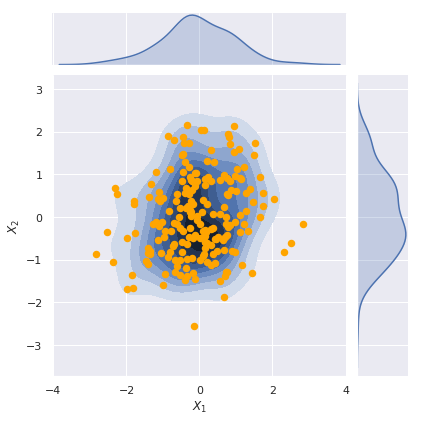

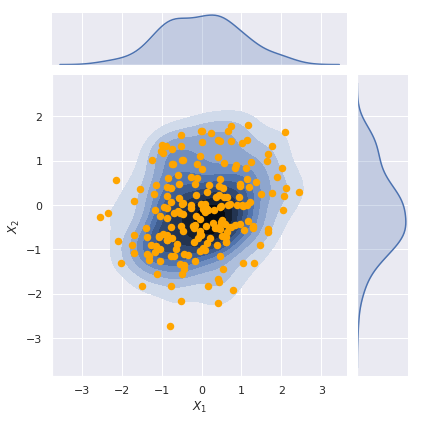

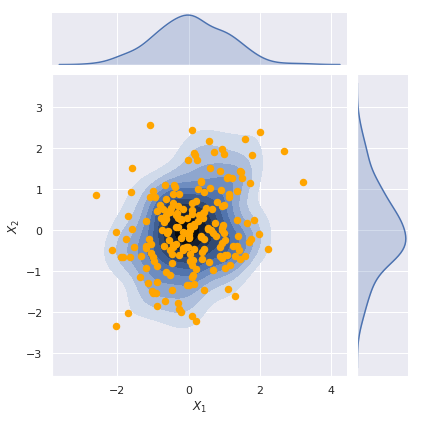

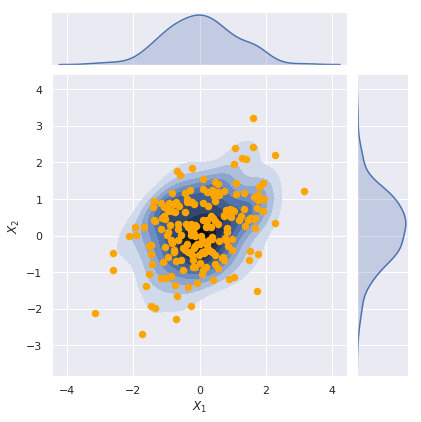

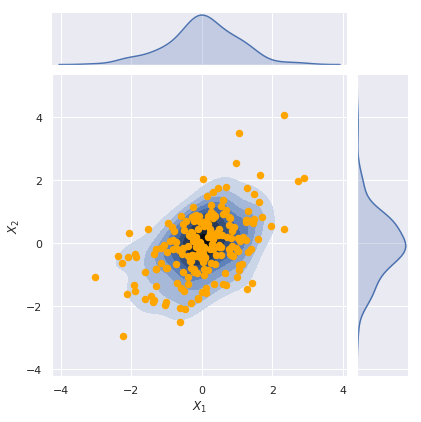

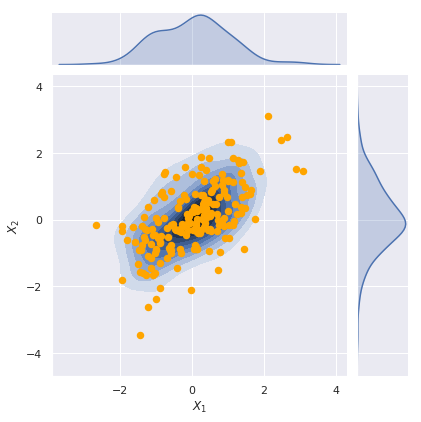

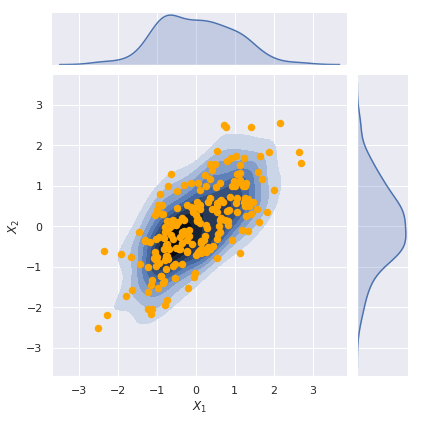

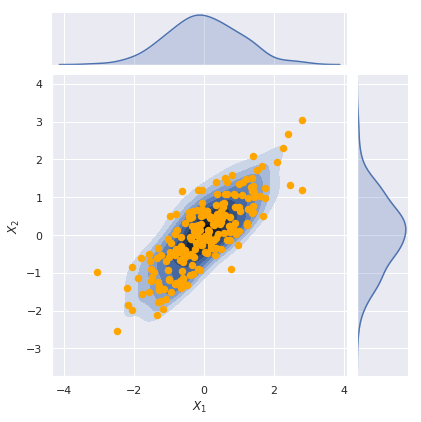

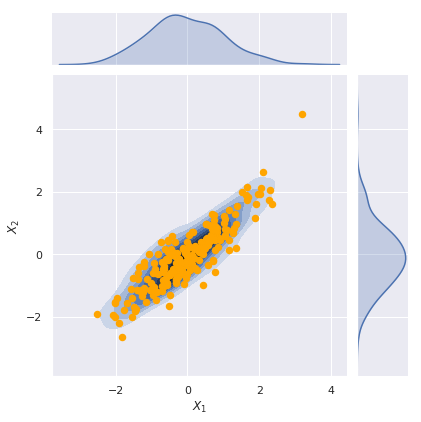

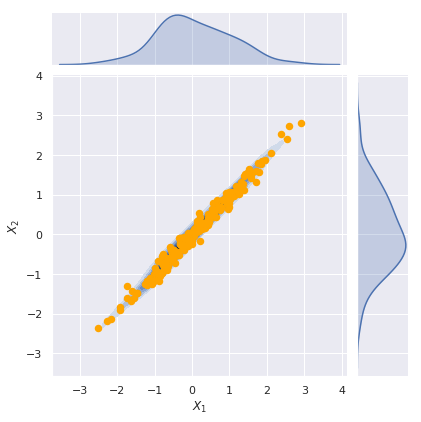

In [31]:
dataset = defaultdict(dict)

for i, rho in enumerate(np.linspace(0.1, 0.99, 10)):
    data = generate_2d_data(5000, rho=rho)
    indices = np.random.choice(NUM_SAMPLES, size=200, replace=False)
    plot_2d_distribution(data[indices], 'orange');
    data = pd.DataFrame(data, columns=['X1', 'X2'])
    dataset[str(i + 1)] = {'rho': rho, 'data': data}
#     data.to_csv('/home/users/piyushb/data/synthetic/gaussian-2d/rho_{}.csv'.format(np.round(rho, 3)))

In [32]:
dataset['5']['data'].head()

,X1,X2
0,0.020768,0.886480
1,0.992584,0.979937
2,-0.115605,0.869738
3,-0.200930,-0.523900
4,-0.064545,1.146867


In [33]:
dataset['metainfo'] = '2D Gaussian data with each feature having mean 0 and variance 1 with correlation being a given rho'

In [34]:
def save_pkl(obj, path):
    with open(path, 'wb') as f:
        pickle.dump(obj, f)
    return 

In [35]:
save_pkl(dataset, '/home/users/piyushb/data/synthetic/gaussian-2d/v1.pkl')

In [36]:
dataset.keys()

dict_keys(['9', '8', '6', '4', '2', '10', '5', '7', 'metainfo', '3', '1'])

In [37]:
for key in [str(i+1) for i in range(10)]:
    print(dataset[key]['rho'])

0.1
0.1988888888888889
0.2977777777777778
0.3966666666666666
0.4955555555555555
0.5944444444444444
0.6933333333333332
0.7922222222222222
0.8911111111111111
0.99
